In [ ]:
"""
YOLOv3 Training Script for Google Colab
This script sets up the environment, downloads your Roboflow dataset, and trains a YOLOv3 model.
"""

# INITIAL SETUP
!pip install ultralytics roboflow


In [ ]:
from ultralytics import YOLO
import os
from google.colab import drive
from roboflow import Roboflow

In [ ]:
# Mount Google Drive to save models
drive.mount('/content/drive')
save_dir = '/content/drive/MyDrive/yolov3tiny_training'
os.makedirs(save_dir, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# DOWNLOAD DATASET FROM ROBOFLOW
rf = Roboflow(api_key="GxIQV8VK2SzzOLiapv3z")
project = rf.workspace("ais4002-assigment").project("my-first-project-cyllk")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# Print dataset information
print(f"Dataset downloaded to: {dataset.location}")
print(f"Data configuration file: {dataset.location}/data.yaml")


Dataset downloaded to: /content/My-First-Project-2
Data configuration file: /content/My-First-Project-2/data.yaml


In [ ]:
# TRAIN THE MODEL
# YOLOv3-tiny is the lightweight version, similar to YOLOv8n
model = YOLO('yolov3-tiny.pt')  # Load pre-trained YOLOv3-tiny model

PRO TIP 💡 Replace 'model=yolov3-tiny.pt' with new 'model=yolov3-tinyu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 23.3M/23.3M [00:00<00:00, 37.6MB/s]


In [ ]:
# TRAINING CONFIGURATION
# Modified parameters appropriate for YOLOv3
epochs = 100             # For small dataset, 100-150 epochs is often sufficient
batch_size = 16          # Smaller batch size for limited VRAM
image_size = 640         # Standard YOLOv3 input size
patience = 20            # Early stopping patience

# Start training
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=epochs,
    batch=batch_size,
    imgsz=image_size,
    patience=patience,
    project=save_dir,
    name='yolov3tiny_custom',
    exist_ok=True,
    pretrained=True,
    optimizer="AdamW",   # Advanced optimizer
    cos_lr=True,         # Cosine learning rate schedule
    lr0=0.001,           # Initial learning rate
    lrf=0.01,            # Final learning rate ratio
    weight_decay=0.0001, # Weight decay
    warmup_epochs=3,     # Warmup epochs
    seed=0,                 # For reproducibility
    device=0,               # Use GPU 0
)

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov3-tiny.pt, data=/content/My-First-Project-2/data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/yolov3tiny_training, name=yolov3tiny_custom, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning /content/My-First-Project-2/train/labels.cache... 603 images, 255 backgrounds, 0 corrupt: 100%|██████████| 603/603 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/My-First-Project-2/valid/labels.cache... 42 images, 24 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 19 weight(decay=0.0), 24 weight(decay=0.0001), 23 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      14.5G      2.371      2.893      1.491         27        640: 100%|██████████| 38/38 [00:12<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         42         87      0.655      0.598      0.617      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      14.2G      2.074       1.69      1.286         33        640: 100%|██████████| 38/38 [00:12<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         42         87      0.686      0.527      0.597      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.1G      2.109      1.595      1.321         27        640: 100%|██████████| 38/38 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         42         87      0.608      0.609      0.583      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.2G      2.042      1.567       1.26         19        640: 100%|██████████| 38/38 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         42         87      0.644       0.69      0.692      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.7G      2.074      1.588      1.317         15        640: 100%|██████████| 38/38 [00:14<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         42         87      0.637      0.666      0.675      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.9G      2.073      1.495      1.288         40        640: 100%|██████████| 38/38 [00:18<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         42         87      0.645       0.73      0.717       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      14.1G      2.012      1.486      1.245         31        640: 100%|██████████| 38/38 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         42         87      0.797      0.644      0.761      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.2G      1.974       1.44      1.235         27        640: 100%|██████████| 38/38 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         42         87      0.705       0.74      0.754      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.7G      1.963      1.427       1.25         32        640: 100%|██████████| 38/38 [00:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         42         87      0.687      0.724      0.736      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.9G      1.911      1.326       1.23         26        640: 100%|██████████| 38/38 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         42         87      0.814      0.706      0.762      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      14.1G      1.921      1.327      1.179         29        640: 100%|██████████| 38/38 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         42         87       0.93      0.607      0.784      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      14.2G      1.843      1.261      1.182         28        640: 100%|██████████| 38/38 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         42         87      0.864      0.736      0.809      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.7G      1.783       1.18      1.162         36        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         42         87      0.836      0.759        0.8      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.9G      1.873      1.204      1.208         37        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         42         87       0.82      0.805      0.843      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      14.1G      1.858      1.178      1.182         46        640: 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         42         87      0.866      0.724      0.834      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      14.2G      1.812      1.211      1.177         22        640: 100%|██████████| 38/38 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         42         87      0.855      0.713       0.79      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.7G      1.784      1.161      1.154         72        640: 100%|██████████| 38/38 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         42         87      0.804      0.754      0.804      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.9G      1.714      1.106      1.152         26        640: 100%|██████████| 38/38 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]


                   all         42         87      0.861      0.724      0.785      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      14.1G      1.757      1.097      1.131         33        640: 100%|██████████| 38/38 [00:12<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         42         87      0.888      0.713      0.796      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.2G      1.763      1.133      1.161         44        640: 100%|██████████| 38/38 [00:11<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         42         87      0.863      0.701      0.798      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.7G      1.701      1.103      1.134         26        640: 100%|██████████| 38/38 [00:11<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         42         87      0.924      0.759      0.855      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.9G      1.656      1.045      1.126         35        640: 100%|██████████| 38/38 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         42         87      0.871      0.805      0.826      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.1G      1.627      1.059      1.093         16        640: 100%|██████████| 38/38 [00:11<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]


                   all         42         87      0.926      0.721      0.825      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.2G      1.704      1.114      1.133         15        640: 100%|██████████| 38/38 [00:11<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         42         87      0.893      0.805       0.88      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.7G      1.654      1.062      1.104         43        640: 100%|██████████| 38/38 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         42         87      0.858      0.759      0.848      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.9G      1.627     0.9834      1.095         37        640: 100%|██████████| 38/38 [00:10<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         42         87      0.851      0.816       0.83      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.1G      1.575     0.9821      1.086         44        640: 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         42         87      0.835      0.758      0.814      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.2G      1.618     0.9894      1.084         32        640: 100%|██████████| 38/38 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         42         87      0.918      0.736      0.818      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.7G      1.542     0.9449       1.09         27        640: 100%|██████████| 38/38 [00:11<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         42         87      0.897      0.747      0.813       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.9G      1.579     0.9565      1.076         43        640: 100%|██████████| 38/38 [00:11<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         42         87      0.815      0.805      0.793      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.1G       1.56     0.9529      1.082         27        640: 100%|██████████| 38/38 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         42         87      0.841      0.713      0.809      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.2G      1.562      0.928      1.076         74        640: 100%|██████████| 38/38 [00:13<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         42         87       0.92      0.736      0.865      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.7G      1.506     0.9206      1.069         29        640: 100%|██████████| 38/38 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         42         87      0.832      0.739      0.813      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.9G      1.522     0.9057      1.065         25        640: 100%|██████████| 38/38 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         42         87       0.88      0.736      0.828      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.1G      1.469      0.903      1.075         21        640: 100%|██████████| 38/38 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         42         87      0.866      0.736      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      14.2G      1.529     0.9104       1.07         18        640: 100%|██████████| 38/38 [00:11<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         42         87      0.892      0.665      0.798      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.7G      1.478     0.8705      1.057         22        640: 100%|██████████| 38/38 [00:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         42         87      0.947      0.713      0.864      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.9G      1.441     0.8526      1.039         52        640: 100%|██████████| 38/38 [00:10<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         42         87      0.788      0.782      0.809       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.1G      1.431     0.8669      1.034         38        640: 100%|██████████| 38/38 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         42         87       0.88      0.762      0.818      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.2G      1.479     0.8756      1.048         17        640: 100%|██████████| 38/38 [00:11<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         42         87      0.903      0.724      0.819       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.7G      1.437     0.8817      1.059         16        640: 100%|██████████| 38/38 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         42         87      0.843      0.747      0.807      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      13.9G      1.384     0.8258      1.029         57        640: 100%|██████████| 38/38 [00:11<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         42         87       0.83      0.701      0.789      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.1G      1.467     0.8575      1.036         38        640: 100%|██████████| 38/38 [00:11<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         42         87      0.877       0.77      0.852      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.2G      1.379     0.8398      1.015         29        640: 100%|██████████| 38/38 [00:11<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         42         87      0.882      0.805      0.837      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.7G      1.397     0.8488      1.021         25        640: 100%|██████████| 38/38 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         42         87      0.897       0.77      0.839      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.9G      1.371     0.8222      1.022         34        640: 100%|██████████| 38/38 [00:11<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         42         87      0.888      0.724      0.826      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.1G      1.377     0.8218      1.024         25        640: 100%|██████████| 38/38 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         42         87      0.825      0.811      0.849      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.2G      1.351     0.7938      1.006         51        640: 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         42         87      0.936      0.667      0.817      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.7G      1.304     0.7588     0.9945         31        640: 100%|██████████| 38/38 [00:11<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         42         87      0.807      0.767      0.837      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.9G      1.295     0.7677      1.004         40        640: 100%|██████████| 38/38 [00:11<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         42         87      0.851      0.805      0.867       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.1G      1.333      0.789     0.9956         35        640: 100%|██████████| 38/38 [00:11<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         42         87        0.9      0.724      0.816      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.2G      1.321     0.7692          1         34        640: 100%|██████████| 38/38 [00:11<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         42         87      0.943      0.755       0.84      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.7G      1.275     0.7739     0.9945         34        640: 100%|██████████| 38/38 [00:11<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         42         87      0.916      0.759      0.839       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.9G      1.273     0.7492     0.9841         46        640: 100%|██████████| 38/38 [00:11<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         42         87      0.941      0.738      0.845      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.1G       1.29     0.7652     0.9908         30        640: 100%|██████████| 38/38 [00:11<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         42         87       0.88      0.761      0.826      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.2G      1.265     0.7615      1.004         23        640: 100%|██████████| 38/38 [00:10<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         42         87      0.939       0.77      0.835      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      13.7G      1.215     0.7214     0.9852         28        640: 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         42         87      0.912      0.759      0.835      0.555
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 37, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



57 epochs completed in 0.216 hours.
Optimizer stripped from /content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom/weights/last.pt, 24.4MB
Optimizer stripped from /content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom/weights/best.pt, 24.4MB

Validating /content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv3-tiny summary (fused): 34 layers, 12,128,178 parameters, 0 gradients, 18.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


                   all         42         87      0.954      0.719      0.865      0.571
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom


In [ ]:
# VALIDATE THE TRAINED MODEL
metrics = model.val(data=f"{dataset.location}/data.yaml")
print(f"Validation metrics: {metrics}")

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv3-tiny summary (fused): 34 layers, 12,128,178 parameters, 0 gradients, 18.9 GFLOPs


val: Scanning /content/My-First-Project-2/valid/labels.cache... 42 images, 24 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]


                   all         42         87      0.947      0.713      0.859      0.568
Speed: 9.7ms preprocess, 10.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom
Validation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ba6db0e7910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.02802

In [ ]:
# EXPORT THE MODEL
# Get the path of the best weights
weights_dir = os.path.join(save_dir, 'yolov3_custom', 'weights')
best_pt = os.path.join(weights_dir, 'best.pt')

# Export to ONNX format
model.export(format="onnx", imgsz=image_size)  # Creates best.onnx in the same folder

# Print actual paths for both PT and ONNX models
print(f"PyTorch model saved at: {best_pt}")
print(f"ONNX model exported to: {os.path.join(weights_dir, 'best.onnx')}")

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 2000) (23.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 299.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 322.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 140.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 235.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 188.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 14.9s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting e

Running inference on: /content/My-First-Project-2/test/images/opera_OrKzjF6kU5_crop_1_1_jpg.rf.e1e1e16945f55c83c4727815317b34e6.jpg

image 1/1 /content/My-First-Project-2/test/images/opera_OrKzjF6kU5_crop_1_1_jpg.rf.e1e1e16945f55c83c4727815317b34e6.jpg: 640x640 9 vehicles, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom
Inference results saved to: /content/drive/MyDrive/yolov3tiny_training/yolov3tiny_custom


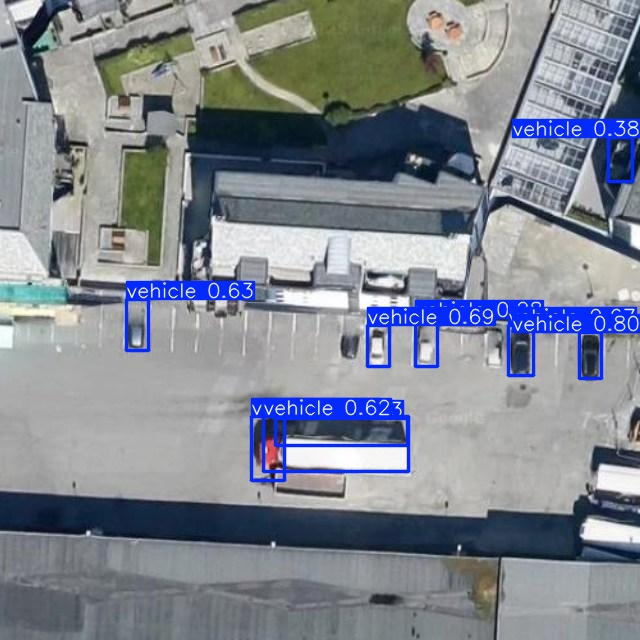

In [ ]:
# RUN INFERENCE ON A TEST IMAGE
# Find all test images in the directory
import glob

# Get a list of all test images
test_image_dir = f"{dataset.location}/test/images"
test_images = glob.glob(f"{test_image_dir}/*.jpg") + glob.glob(f"{test_image_dir}/*.jpeg") + glob.glob(f"{test_image_dir}/*.png")

if test_images:
    # Use the first test image found
    test_image_path = test_images[9]
    print(f"Running inference on: {test_image_path}")
    # Perform inference
    results = model.predict(test_image_path, save=True, conf=0.25)
    print(f"Inference results saved to: {results[0].save_dir}")

    # If you want to display the results directly in Colab
    from IPython.display import Image, display
    display(Image(os.path.join(results[0].save_dir, os.path.basename(test_image_path))))
else:
    print(f"No test images found in {test_image_dir}")
    print("Try running inference on a specific image with:")
    print("model.predict('/path/to/your/image.jpg', save=True, conf=0.25)")

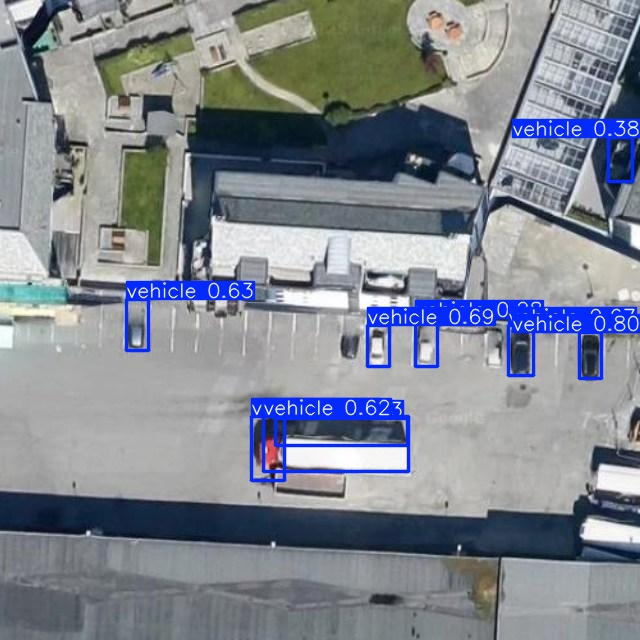

Training, validation, and export complete!


In [ ]:
# If you want to display the results directly in Colab
from IPython.display import Image, display
display(Image(os.path.join(results[0].save_dir, os.path.basename(test_image_path))))

print("Training, validation, and export complete!")